In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loan_data  = pd.read_csv("dataset.csv" )

In [3]:
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [4]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [5]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [7]:
loan_data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [8]:
loan_data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

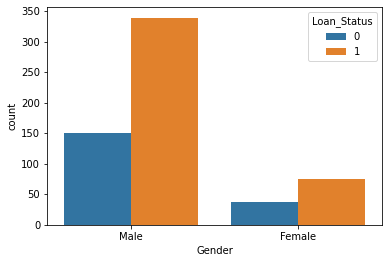

In [9]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

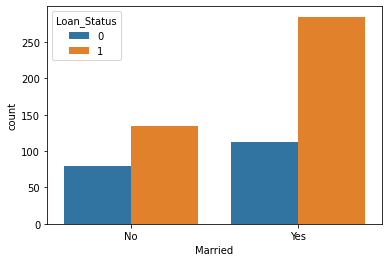

In [10]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [11]:
loan_data.drop('Loan_ID', inplace=True, axis=1)


C:\Users\deepk\AppData\Local\Temp/ipykernel_16484/343508542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= loan_data.corr()


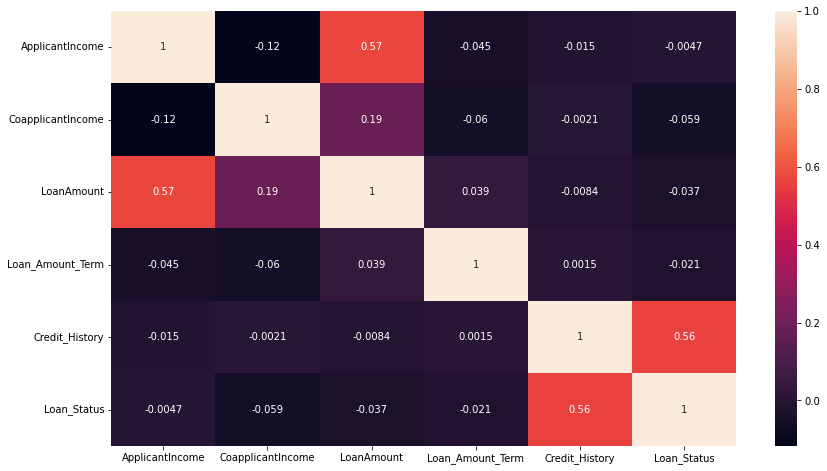

In [12]:
#Plotting correlation
corrmat= loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True)

In [13]:
num_cols = loan_data.select_dtypes(include=np.number).columns

loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].mean())

In [14]:
cat_cols = loan_data.select_dtypes(include = 'object').columns

loan_data[cat_cols] = loan_data[cat_cols].fillna(loan_data[cat_cols].mode())

In [15]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(loan_data[['Gender']])
loan_data[['Gender']] = mode_imputer.transform(loan_data[['Gender']])

In [18]:
mode_imputer = mode_imputer.fit(loan_data[['Married']])
loan_data[['Married']] = mode_imputer.transform(loan_data[['Married']])
mode_imputer = mode_imputer.fit(loan_data[['Self_Employed']])
loan_data[['Self_Employed']] = mode_imputer.transform(loan_data[['Self_Employed']])
mode_imputer = mode_imputer.fit(loan_data[['Dependents']])
loan_data[['Dependents']] = mode_imputer.transform(loan_data[['Dependents']])

In [19]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
loan_data.shape

(614, 12)

In [21]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
loan_data = pd.get_dummies(loan_data, columns=cat_cols)
loan_data.shape
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [23]:
y=loan_data['Loan_Status']
x=loan_data.drop(['Loan_Status'],axis=1)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=24)

In [26]:
len(x_train),len(x_test),len(y_train),len(y_test)

(491, 123, 491, 123)

In [27]:
import xgboost as xgb

In [28]:
params = {
    'booster':'dart',
    'max_depth': 7,
    'learning_rate': 0.5,
    'n_estimators': 100,
    'subsample': 1.0,
    'early_stopping':None,
    'min_split_loss':0.0,
    'sample_type':'uniform',
    'tree_method':'auto',
    'min_child_weight':1.0,
    'lambda':1.0,
    'alpha':0,
    'colsample_bytree':0.9
}

In [29]:
model = xgb.XGBClassifier(**params)

In [30]:
model.fit(x_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1.0, min_split_loss=0.0, missing=nan,
              monotone_constraints=None, n_estimators=100, ...)

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

82.11382113821138


In [34]:
model.save_model('xgb_model.json')

In [35]:
import pickle
pkl_file = "pkl_xgb_model.pkl"

pickle.dump(model, open(pkl_file, 'wb'))